In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

import astropy.coordinates as coord
from astropy.table import Table
from astropy.io import fits
import astropy.units as u

import scipy.signal as signal

In [2]:
plt.style.use('notebook')

In [4]:
t = Table.read('../data/Kepler_10976252.0.txt', format='ascii')

In [6]:
tm = t['col1']
flux = t['col2']

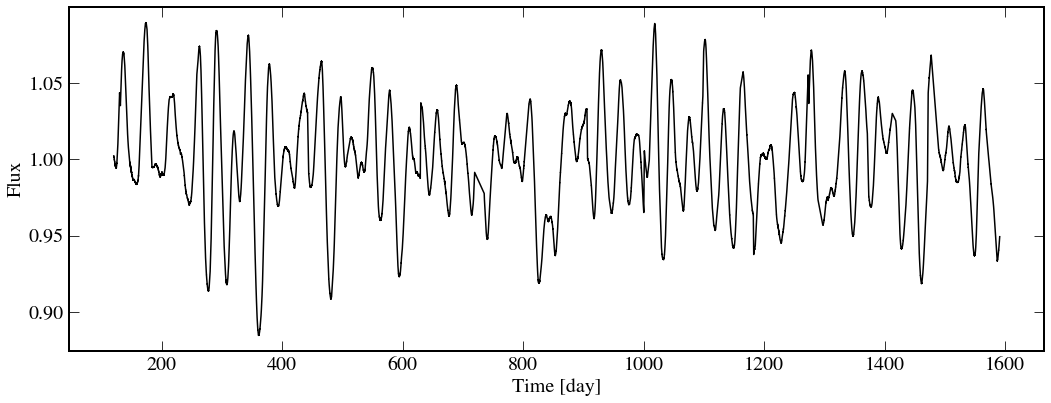

In [69]:
plt.figure(figsize=(15,6))

plt.plot(tm, flux, 'k-')

plt.xlabel('Time [day]')
plt.ylabel('Flux')
plt.tight_layout()

In [8]:
fnorm = flux - np.mean(flux)

In [55]:
np.pi/2

1.5707963267948966

In [60]:
# freq = np.linspace(1e-3,0.2,1000)
# fr = (freq/u.day).to(u.uHz)
# fr = np.logspace(-3,0,1000)*u.uHz
# fr = np.linspace(0.01,1.2,5000)*u.uHz
# freq = fr.to(u.day**-1).value

freq = np.logspace(-3,0,1000)
pgram = signal.lombscargle(tm, fnorm, freq, normalize=True)

In [65]:
86400*1.85*2*np.pi

1004304.3394995851

In [66]:
frlin = (freq / (2*np.pi) * u.day**-1).to(u.uHz)

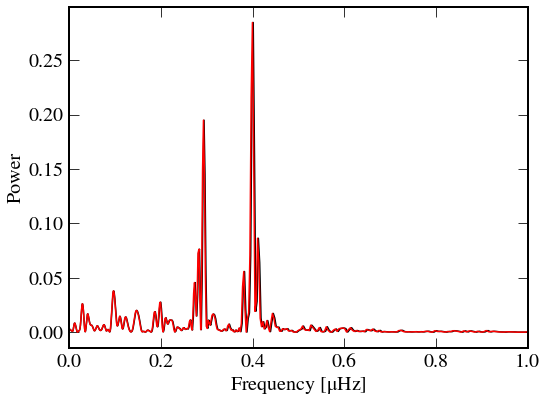

In [68]:
plt.figure(figsize=(8,6))
plt.plot(freq*1.85, pgram, 'k-')
plt.plot(frlin, pgram, 'r-')

plt.xlim(0,1)
plt.xlabel('Frequency [$\mu$Hz]')
plt.ylabel('Power')
plt.tight_layout()